In [65]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime

# Loading the dataset

In [66]:
df=pd.read_csv('F:/flip robo intership31//Micro Credit Defaulter Project-23-10-2022//Micro Credit Project//Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [67]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [68]:
df.shape 

(209593, 36)

In [69]:
df.columns 

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

msisdn and pcircle are the only columns which have object datatypes
the other columns are having either int or float datatype

In [71]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# columns handling

 let's split date into month, day and year so that it will be helpful for further analysis.

In [83]:
df['month']=pd.to_datetime(df['pdate']).dt.month_name()
df['day']=pd.to_datetime(df['pdate']).dt.day
df['year']=pd.to_datetime(df['pdate']).dt.year

In [84]:
df['year'].value_counts()

2016    209593
Name: year, dtype: int64

In [85]:
df['month'].value_counts()

July      85765
June      83154
August    40674
Name: month, dtype: int64

All the records are based only on June, July and August months respectively

In [86]:
df['day'].value_counts()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64

In [87]:
df.drop(columns=['pdate','year'],axis=1,inplace=True)

In [88]:
#looking at pcircle columns to check no.of number of values
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [89]:
df.drop('pcircle',axis=1,inplace=True)

In [90]:
df.head() 

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,July,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,August,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,August,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,June,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,June,22


# Exploratory Data Analysis

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis


 Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter 
 while 
 Label ‘0’ indicates that the loan has not been payed i.e. defaulter 

1    183431
0     26162
Name: label, dtype: int64


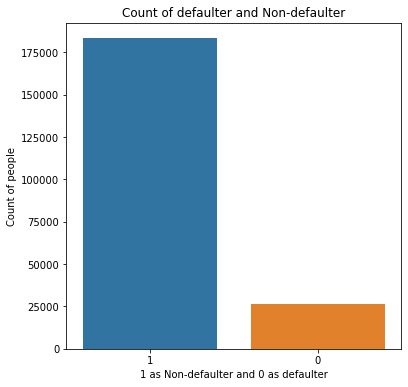

In [92]:
#Counting the number of defaulter and non-defaulter
print('\n','Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter','\n','while', '\n', 'Label ‘0’ indicates that the loan has not been payed i.e. defaulter','\n')
print(df['label'].value_counts())
plt.subplots(figsize=(6,6))
sns.countplot(x='label',data=df,order= df['label'].value_counts().index)
plt.title('Count of defaulter and Non-defaulter')
plt.xlabel('1 as Non-defaulter and 0 as defaulter')
plt.ylabel('Count of people')
plt.show()

We can see that 183431 people had payed their loan amount whereas 26162 people didnot pay the amount.

July      85765
June      83154
August    40674
Name: month, dtype: int64


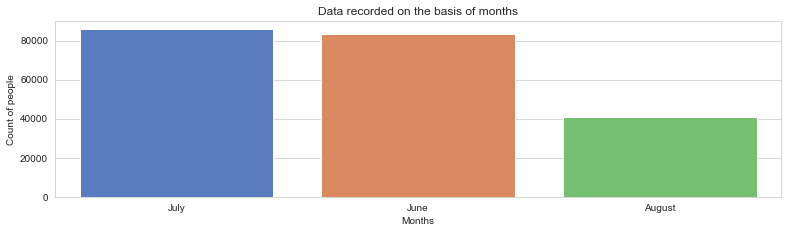

In [93]:
#Data recorded on the basis of months
print(df['month'].value_counts())
plt.figure(figsize = (13,11))
sns.set_style('whitegrid')
plt.subplot(311)
sns.countplot(x='month',data=df,palette='muted',order= df['month'].value_counts().index)
plt.title('Data recorded on the basis of months')
plt.xlabel('Months')
plt.ylabel('Count of people')
plt.show()

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: day, dtype: int64


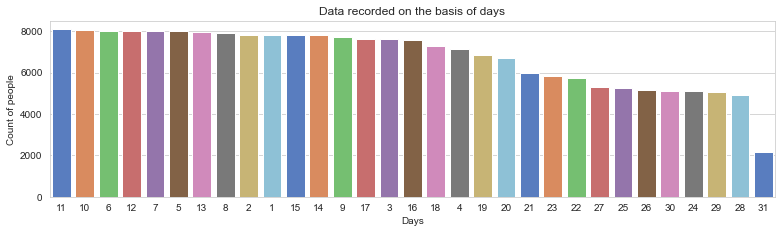

In [94]:
#Data recorded on the basis of days
print(df['day'].value_counts())
plt.figure(figsize = (13,11))
sns.set_style('whitegrid')
plt.subplot(312)
sns.countplot(x='day',data=df,palette='muted',order= df['day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

On 11th day, maximum number of people either took the loans or repayed the loan amount. The number of people is 8092.

On 31st day, minimum number of people either took the loans or repayed the loan amount. The number of people is 2178.

Here maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days. There are only two options: 6 and 12, for which the people need to pay respectively. We can see that the maximum amount of loan amount taken by the people cannot be more than 13Rs so that we can drop them.

In [95]:
df[df['maxamnt_loans30'] > 13]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
118,1,23241I82735,1454.0,19.578667,19.578667,148.88,148.88,1.0,0.0,770,...,61907.697372,0.0,5.0,30,6,0.0,3.500000,3.500000,June,8
125,1,70901I82730,811.0,166.796667,166.796667,-44.88,-44.88,4.0,0.0,2309,...,22099.413732,0.5,4.0,24,6,0.5,2.333333,2.333333,June,22
146,1,73196I70786,198.0,18301.000000,28936.470000,8634.10,11994.34,1.0,0.0,4048,...,98745.934048,0.5,8.0,48,6,0.0,2.500000,1.750000,August,10
369,1,50569I82738,1737.0,33.000000,33.000000,130.05,130.05,1.0,0.0,773,...,58925.364061,0.0,2.0,12,6,0.0,9.500000,9.500000,June,15
374,1,85457I70781,603.0,9970.000000,10770.000000,9343.38,15443.96,9.0,0.0,770,...,78232.464324,0.0,3.0,24,12,0.0,3.333333,32.000000,August,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209189,1,55429I85348,1211.0,16039.000000,18645.190000,8391.52,11936.73,2.0,0.0,1539,...,50824.996349,1.0,11.0,96,12,1.0,5.400000,4.900000,August,8
209262,1,19105I89232,904.0,96.906667,96.906667,2516.20,2516.20,5.0,0.0,7526,...,17324.994582,0.0,1.0,6,6,0.0,0.000000,0.000000,June,20
209331,1,10104I89239,1846.0,55.680000,55.680000,1140.16,1140.16,5.0,0.0,2309,...,92864.501728,0.0,3.0,18,6,0.0,3.500000,3.500000,June,16
209392,1,38900I84450,1639.0,52.031333,52.031333,957.10,957.10,3.0,0.0,1539,...,54259.265687,0.0,6.0,36,6,0.0,3.800000,3.800000,June,17


In [96]:
df.drop(df[df['maxamnt_loans30'] > 13].index, inplace = True)

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64


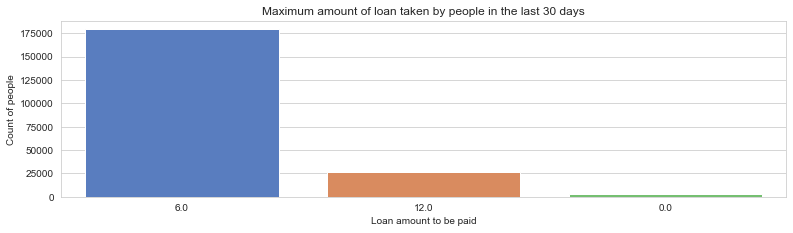



6     180038
12     26477
0       2031
Name: maxamnt_loans90, dtype: int64


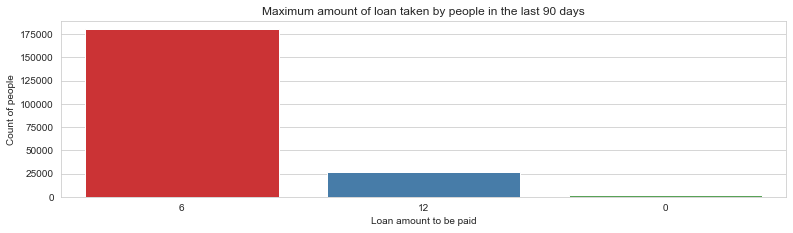

In [97]:
#Maximum amount of loan taken by people in last 30 and 90 days
print(df['maxamnt_loans30'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days')
plt.xlabel('Loan amount to be paid')
plt.ylabel('Count of people')
plt.show()
print('\n')
print(df['maxamnt_loans90'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days')
plt.xlabel('Loan amount to be paid')
plt.ylabel('Count of people')
plt.show()

1     83028
2     42444
3     26900
4     17405
5     11626
6      7732
7      5022
8      3367
0      3244
9      2261
10     1561
11     1137
12      792
13      545
14      381
15      270
16      212
17      163
18       97
19       76
20       52
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
36        1
41        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64


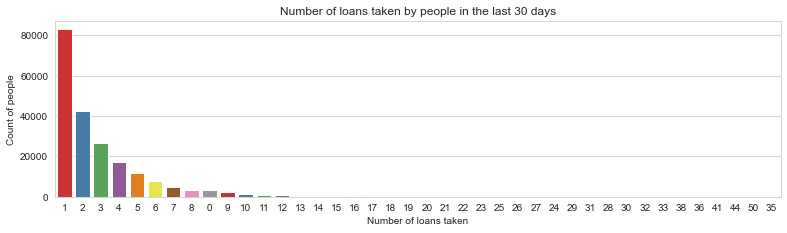

In [98]:
#Counting the number of loans taken by people in the last 30 days
print(df['cnt_loans30'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='cnt_loans30',data=df,palette='Set1',order= df['cnt_loans30'].value_counts().index)
plt.title('Number of loans taken by people in the last 30 days')
plt.xlabel('Number of loans taken')
plt.ylabel('Count of people')
plt.show()

83028 is the maximum number of people who had taken loans and they had taken only once.

Single person had taken loans for 41, 50, 36 times etc.

# Bivariate Analysis

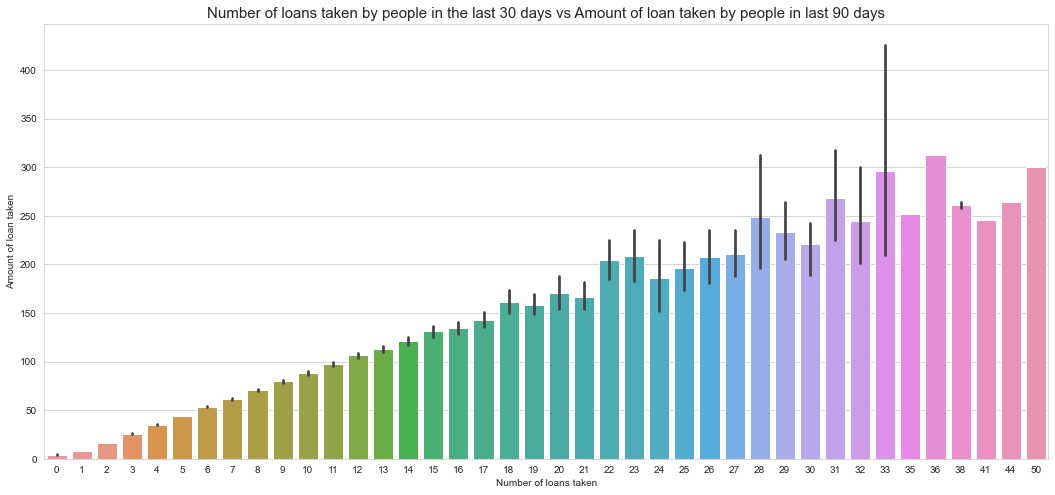

In [99]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans90', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 90 days', fontsize=15)
plt.xlabel('Number of loans taken')
plt.ylabel('Amount of loan taken')
plt.show()

# Checking the data of defaulters alone

In [100]:
defaulters_data=df.loc[df['label'] == 0 ]
defaulters_data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,July,20
11,0,82417I90848,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,7526,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,June,20
15,0,24075I89239,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,June,24
16,0,82053I85350,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,July,4
21,0,75522I70784,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,773,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,July,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,32172I88688,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,July,20
209549,0,59552I90843,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,...,6.0,0.0,2.0,12,6,0.0,0.0,25.5,July,15
209554,0,49076I89233,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,July,13
209571,0,59768I84453,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,July,13


,amnt_loans30
cnt_loans30,
26,156.000000
19,114.000000
18,108.000000
17,102.000000
16,96.000000
15,90.000000
14,87.000000
13,83.250000
12,77.500000


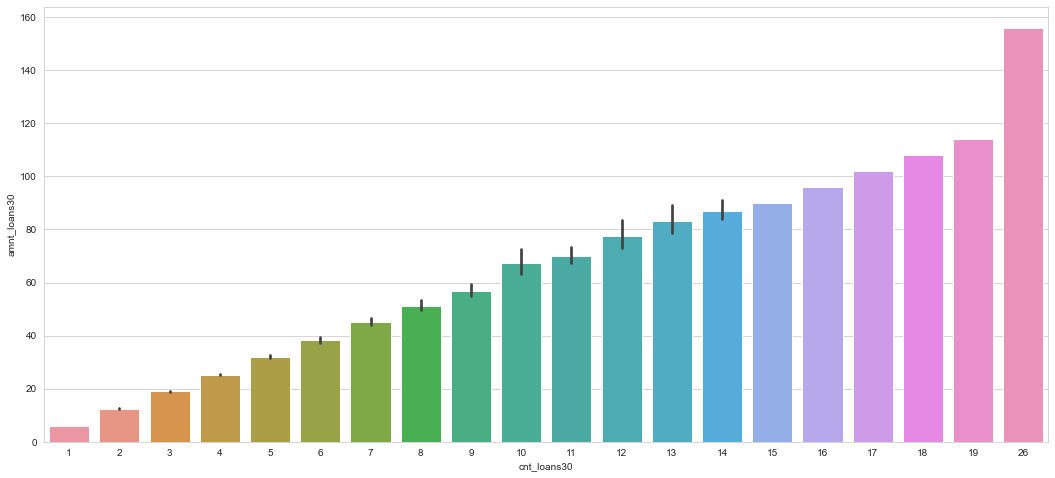

In [101]:
#Checking the number of loans taken by people in last 90 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x='cnt_loans30',y='amnt_loans30', data=defaulters_data)
pd.DataFrame(defaulters_data.groupby('cnt_loans30')['amnt_loans30'].mean().sort_values(ascending=False))

Maximum number of times the loan taken by the people is 26 and the amount is equivalent to 15.

Minimum number of times the loan taken by the people is 1 and the amount is equivalent to 6.

June    13187
July    12846
Name: month, dtype: int64


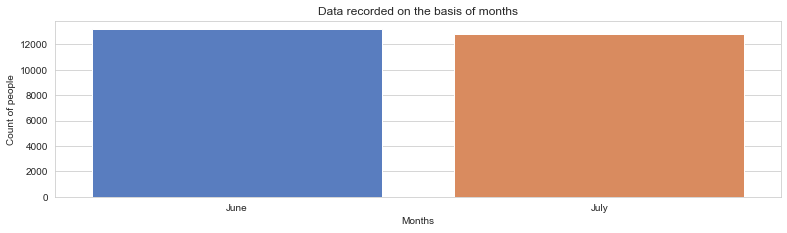

In [103]:
#Data recorded on the basis of months
print(defaulters_data['month'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='month',data=defaulters_data,palette='muted',order=defaulters_data['month'].value_counts().index)
plt.title('Data recorded on the basis of months')
plt.xlabel('Months')
plt.ylabel('Count of people')
plt.show()

The records had been available in the months of June and July, whereas there are no records in August.

Maximum number of records are available in June with a value of 13187

20    1182
17    1114
14    1102
22    1101
15    1099
13    1093
10    1090
18    1085
23    1073
12    1063
19    1024
16    1006
11     995
5      993
21     990
6      937
8      935
7      914
9      900
2      841
1      829
3      823
4      800
27     504
26     452
30     451
25     438
24     423
29     413
28     363
Name: day, dtype: int64


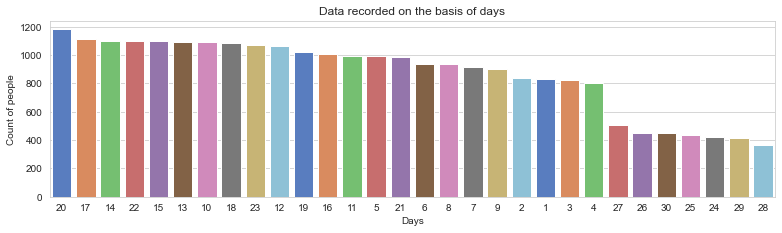

In [104]:
#Data recorded on the basis of days
print(defaulters_data['day'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(312)
sns.countplot(x='day',data=defaulters_data,palette='muted',order=defaulters_data['day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

On 20th day the maximum number of records are there and the value is 1182.

On 28th day, the minimum number of records are there and the value is 363.

<AxesSubplot:xlabel='cnt_loans30', ylabel='payback30'>

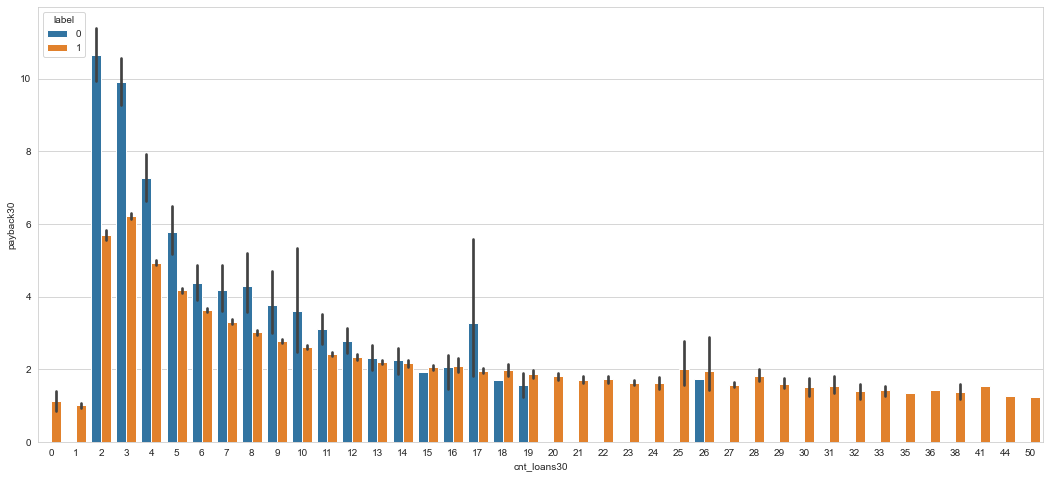

In [105]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)

We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters

# Converting categorical data into numerical data

In [106]:
df.dtypes  #Checking the datatypes of the features

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['month']=le.fit_transform(df['month'])

In [108]:
df['month'].dtype   #Checking the datatype of month after conversion

dtype('int32')

We can see that the data has been converted into numerical data

In [109]:
#Dropping msisdn as it is not important in the analysis
df.drop('msisdn',axis=1,inplace=True)

# Multivariate Analysis

In [110]:
df.describe()    #Statistical summary of the dataset

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,...,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000,208546.000000
mean,0.875169,8129.800502,5382.176429,6083.328238,2692.977029,3484.126461,3753.245773,3716.538130,2064.445158,3.978192,...,6.657840,0.053945,18.486489,23.649056,6.703327,0.045978,3.400163,4.323063,1.202512,14.397409
std,0.330528,75789.889949,9221.838881,10920.483633,4309.893601,5772.799363,53885.607334,53402.052249,2371.554162,4.255603,...,2.152741,0.217876,224.514793,26.485791,2.103928,0.200486,8.822465,10.314159,0.741324,8.437661
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,246.000000,42.470500,42.704167,280.600000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.000000,7.000000
50%,1.000000,527.000000,1471.000000,1500.000000,1084.220000,1334.850000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,1.000000,14.000000
75%,1.000000,982.000000,7243.000000,7800.585000,3356.900000,4202.640000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2.000000,31.000000


Nearly all the columns have high max values and it is due to the presence of outliers.
The mean value is greater than the median value for most of the columns.
The value of min is 0 for most of the columns.

In [111]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003786,0.168217,0.166077,0.057973,0.075421,0.003759,0.001874,0.131552,0.237201,...,0.074167,0.044536,0.004818,0.199648,0.084053,0.035670,0.048238,0.049131,-0.154894,0.006629
aon,-0.003786,1.000000,0.001128,0.000380,-0.001056,-0.000896,0.001722,-0.001687,0.004382,-0.003087,...,-0.001420,0.004788,-0.000582,-0.002371,-0.001225,0.002893,0.001888,0.002198,0.002050,0.000853
daily_decr30,0.168217,0.001128,1.000000,0.977673,0.441888,0.458730,0.000379,-0.001540,0.275909,0.451438,...,0.381003,-0.011765,0.009043,0.563801,0.400102,-0.037516,0.026817,0.047039,-0.518443,0.006742
daily_decr90,0.166077,0.000380,0.977673,1.000000,0.434495,0.471477,0.000843,-0.001790,0.264199,0.426739,...,0.374448,-0.005794,0.009552,0.567559,0.397173,-0.034921,0.019301,0.040647,-0.539204,-0.021259
rental30,0.057973,-0.001056,0.441888,0.434495,1.000000,0.955230,-0.001039,0.003391,0.127314,0.233137,...,0.218354,-0.016308,0.004007,0.298752,0.234048,-0.035391,0.072912,0.094912,-0.365465,0.036662
rental90,0.075421,-0.000896,0.458730,0.471477,0.955230,1.000000,-0.001644,0.002925,0.121523,0.230046,...,0.229349,-0.009344,0.005158,0.327263,0.250849,-0.034115,0.067016,0.099269,-0.429159,0.009094
last_rech_date_ma,0.003759,0.001722,0.000379,0.000843,-0.001039,-0.001644,1.000000,0.001821,0.000028,0.004238,...,-0.001239,0.001181,-0.000187,0.001046,-0.001248,0.002056,-0.002107,-0.001440,0.001185,0.000445
last_rech_date_da,0.001874,-0.001687,-0.001540,-0.001790,0.003391,0.002925,0.001821,1.000000,-0.000015,0.001741,...,0.002533,0.000155,-0.000947,0.000651,0.001614,-0.002155,0.000170,0.000520,0.001715,0.000790
last_rech_amt_ma,0.131552,0.004382,0.275909,0.264199,0.127314,0.121523,0.000028,-0.000015,1.000000,-0.002644,...,0.137780,0.028506,0.000209,0.014146,0.148400,0.021074,-0.027303,-0.014258,-0.096930,0.028933
cnt_ma_rech30,0.237201,-0.003087,0.451438,0.426739,0.233137,0.230046,0.004238,0.001741,-0.002644,1.000000,...,0.173967,-0.066857,0.014885,0.685186,0.174084,-0.071354,0.043586,0.017366,-0.156049,0.068653


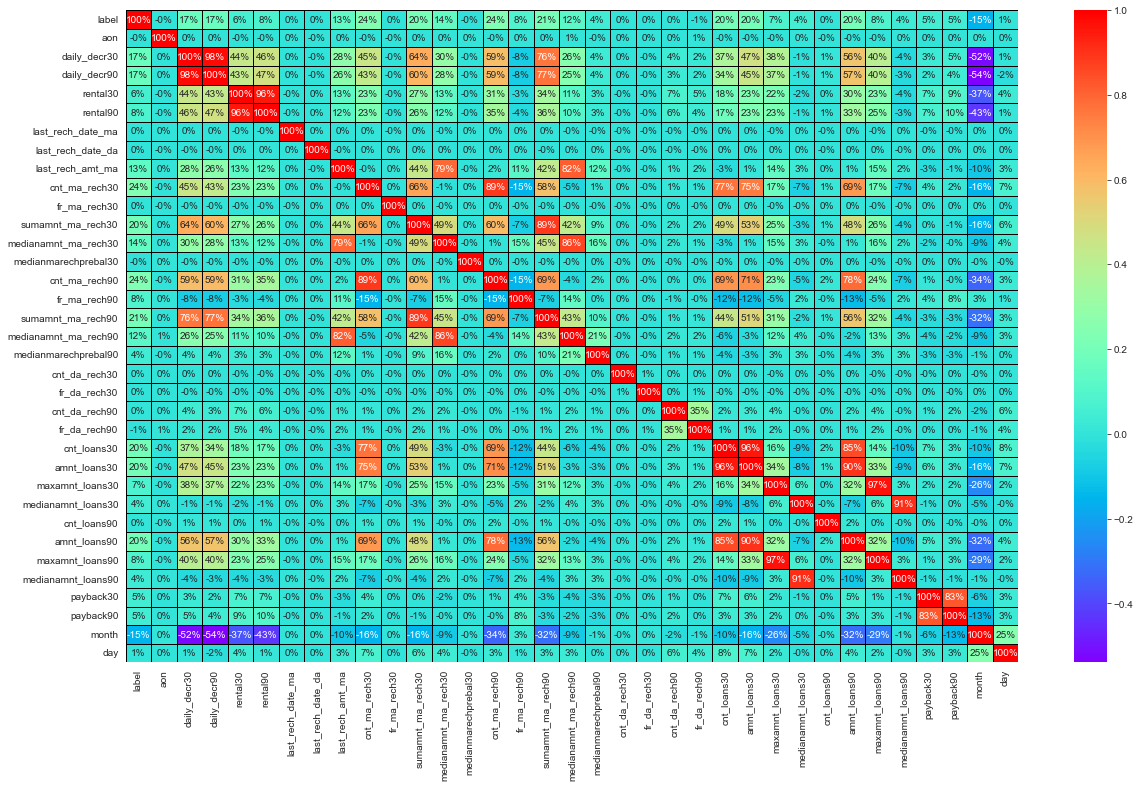

In [112]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(20,12))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation with Target variable')

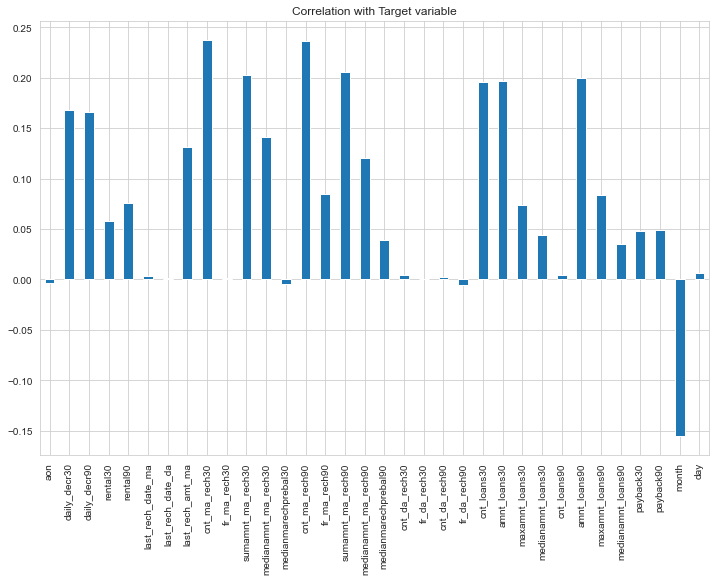

In [113]:
#lets check how the columns are correlated with the target variable
plt.figure(figsize=(12,8))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

-> Nearly all the columns are positively correlated with the target variable.

-> month column is highly negative correlated with the target variable with a highest value of -54%.

-> 98% is the highest positive correlated value.

-> Positively correlated columns have a higher impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

# Checking skewness

In [114]:
df.skew()

label                   -2.270142
aon                     10.381028
daily_decr30             3.949007
daily_decr90             4.255740
rental30                 4.529371
rental90                 4.444019
last_rech_date_ma       14.794160
last_rech_date_da       14.803511
last_rech_amt_ma         3.788305
cnt_ma_rech30            3.286169
fr_ma_rech30            14.765036
sumamnt_ma_rech30        6.402504
medianamnt_ma_rech30     3.518825
medianmarechprebal30    14.768321
cnt_ma_rech90            3.425067
fr_ma_rech90             2.285936
sumamnt_ma_rech90        4.905514
medianamnt_ma_rech90     3.759065
medianmarechprebal90    44.907213
cnt_da_rech30           17.815473
fr_da_rech30            14.790531
cnt_da_rech90           27.247194
fr_da_rech90            28.990106
cnt_loans30              2.713831
amnt_loans30             2.977827
maxamnt_loans30          1.428561
medianamnt_loans30       4.556332
cnt_loans90             16.620254
amnt_loans90             3.152040
maxamnt_loans9

All the columns have high skewness present

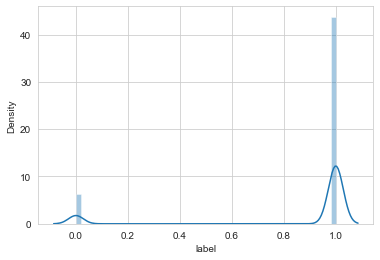

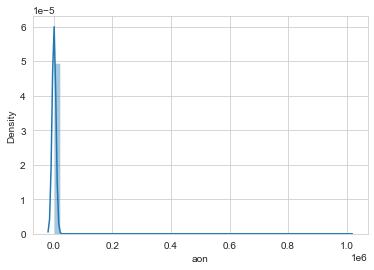

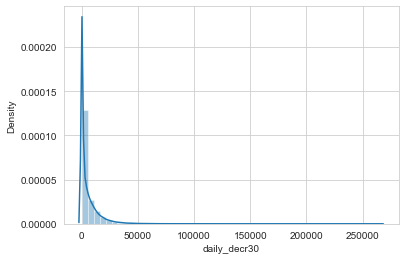

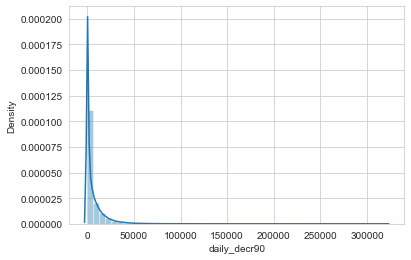

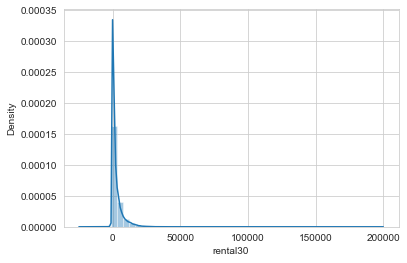

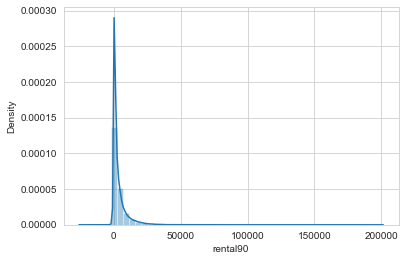

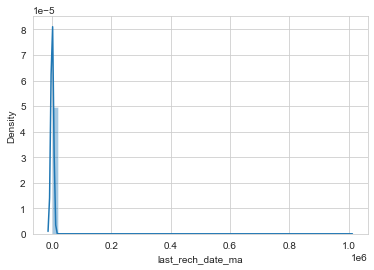

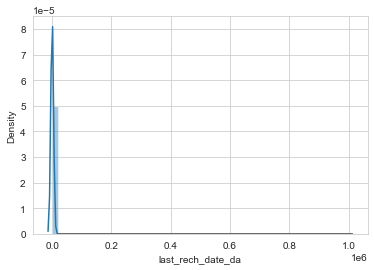

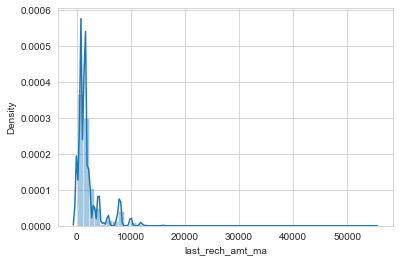

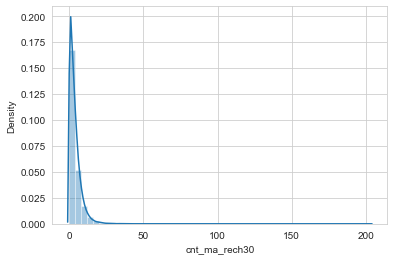

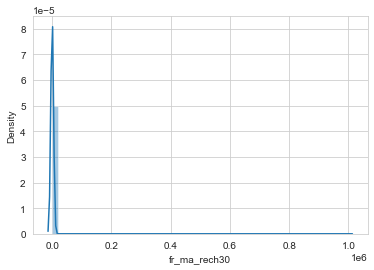

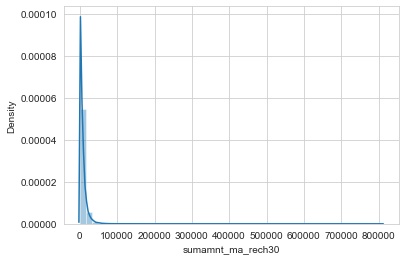

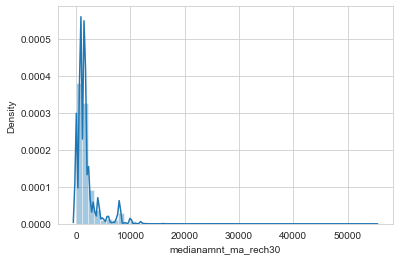

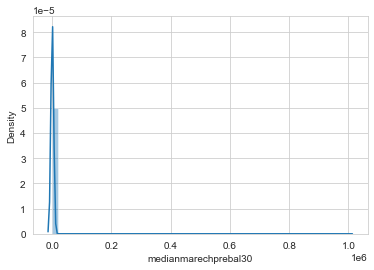

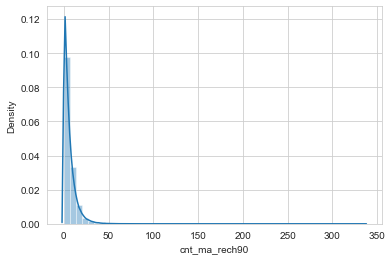

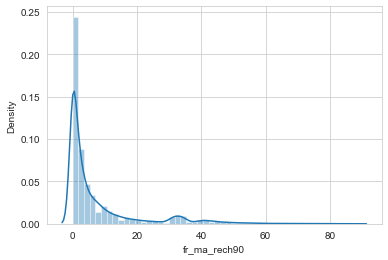

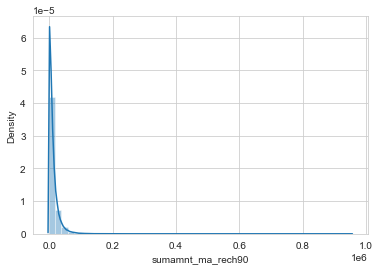

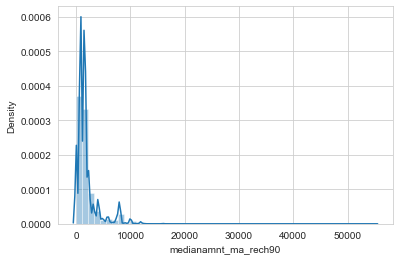

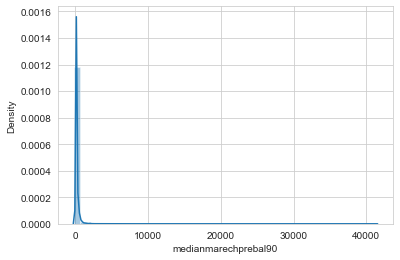

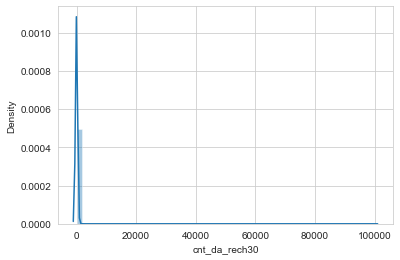

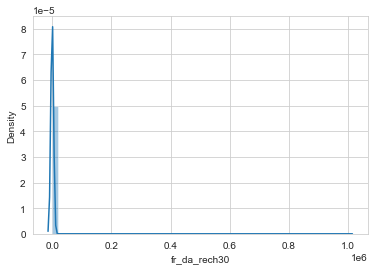

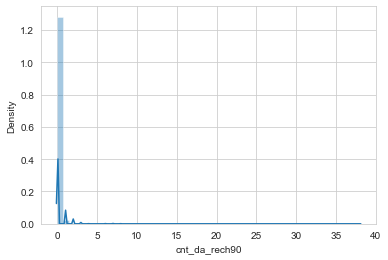

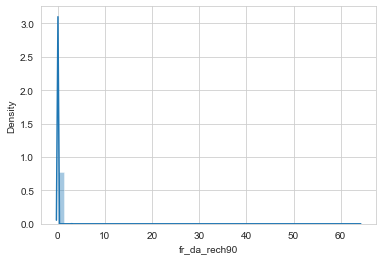

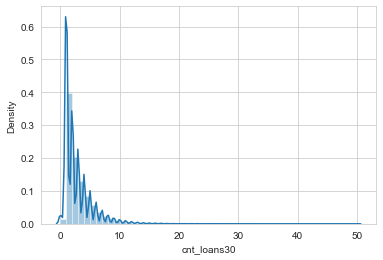

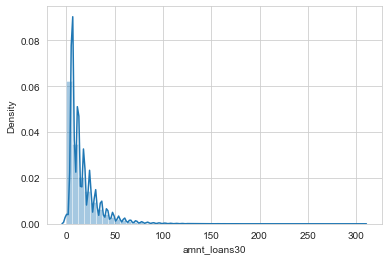

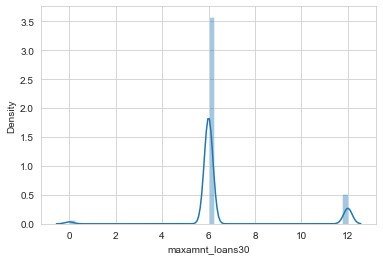

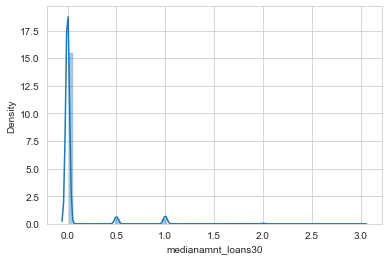

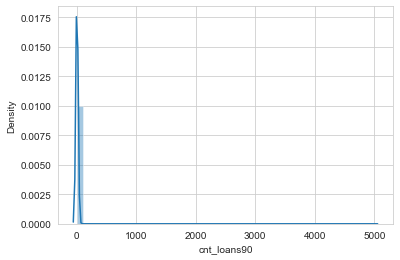

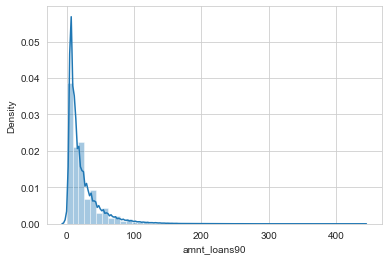

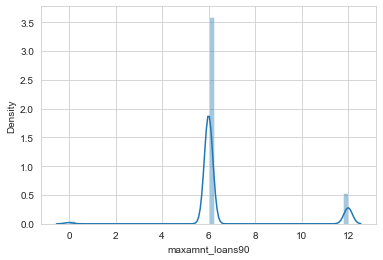

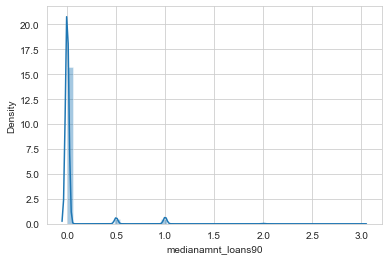

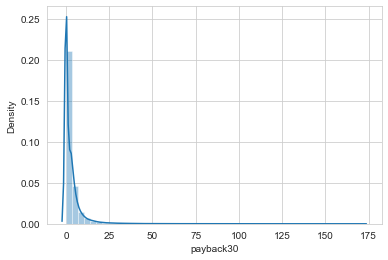

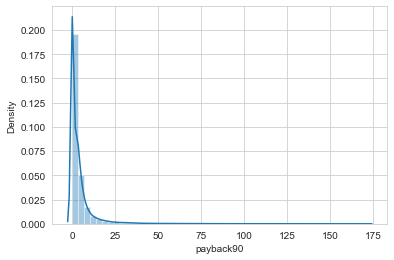

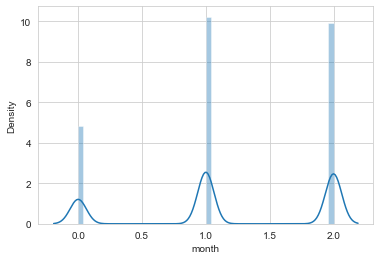

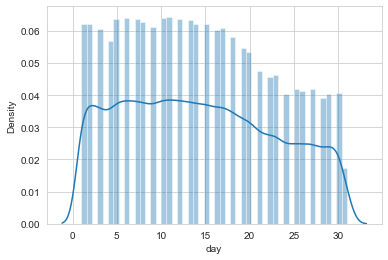

In [115]:
#Plotting distplot for checking the distribution of skewness
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

We can see that most of the features are not normally distributed and it is due to the presence of outliers

# Checking outliers

We can check outliers by plotting boxplot

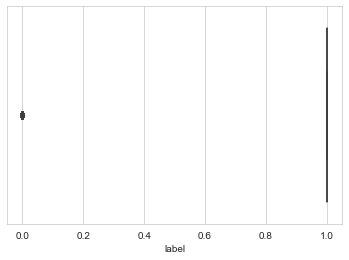

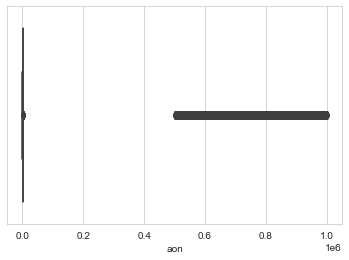

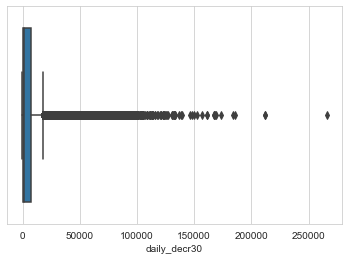

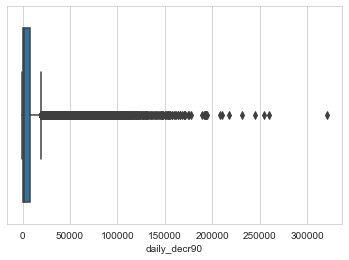

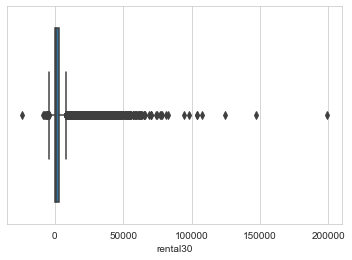

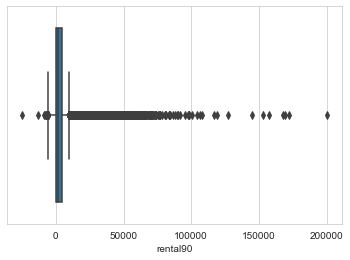

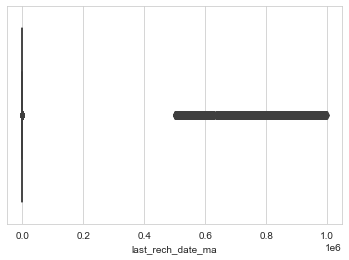

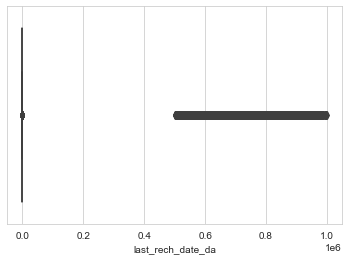

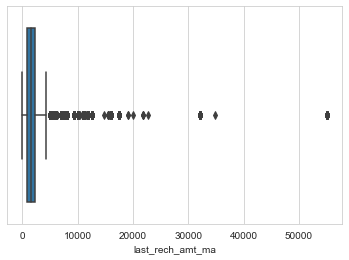

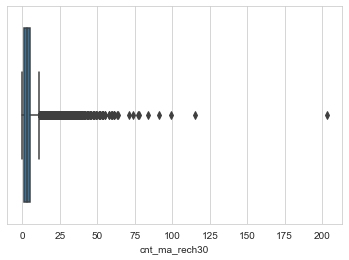

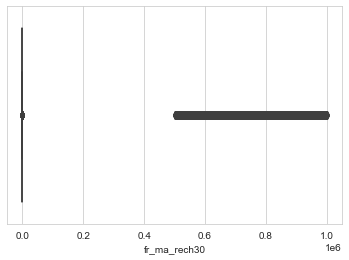

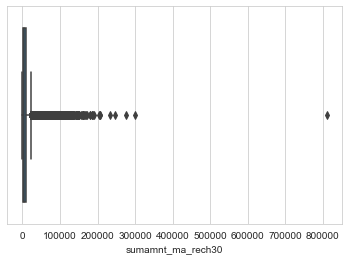

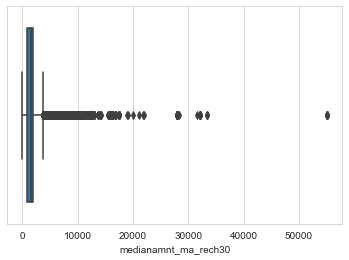

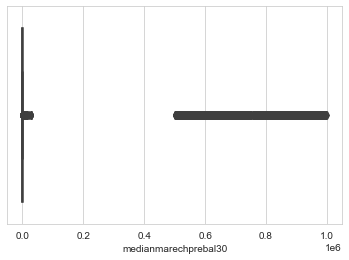

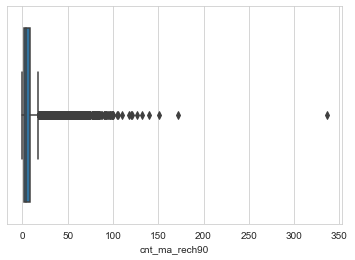

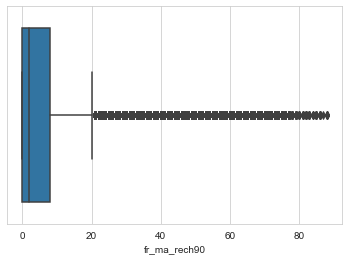

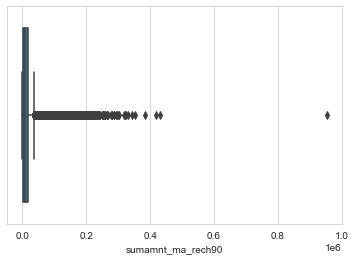

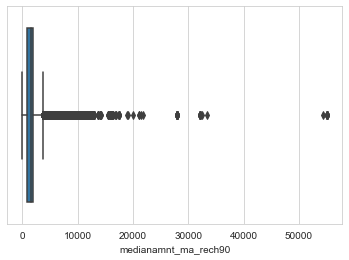

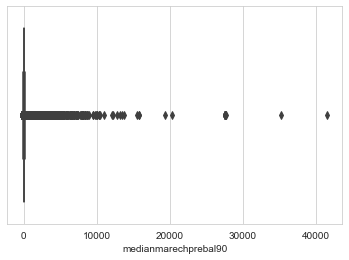

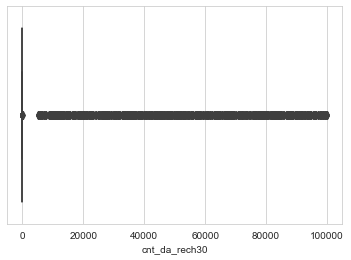

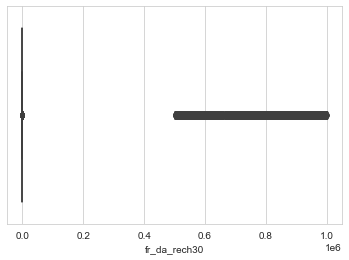

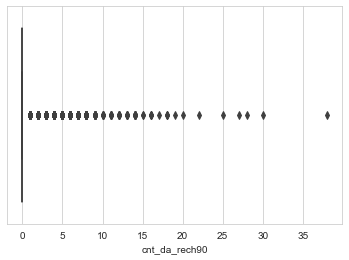

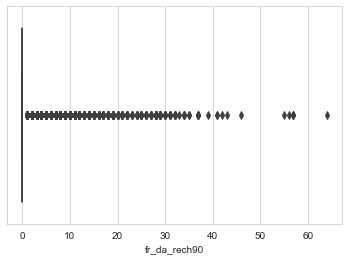

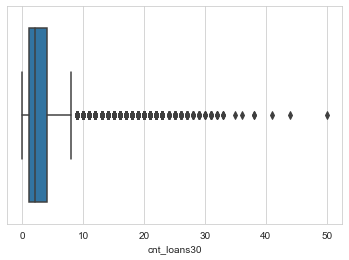

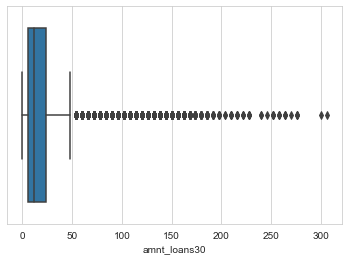

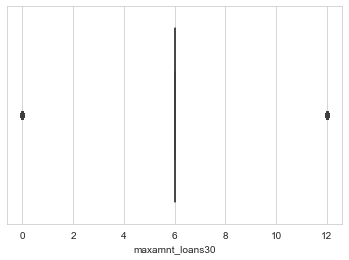

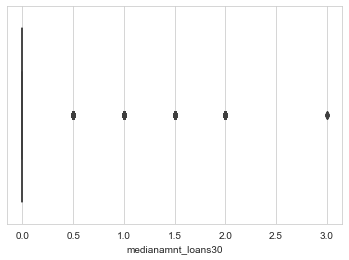

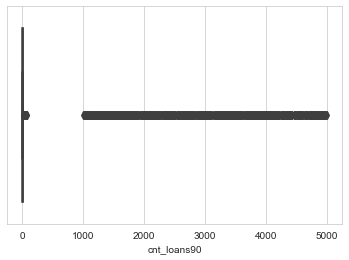

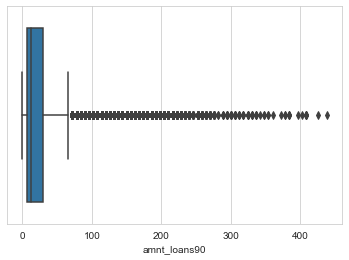

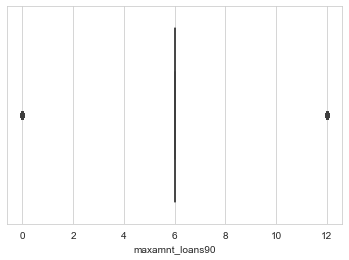

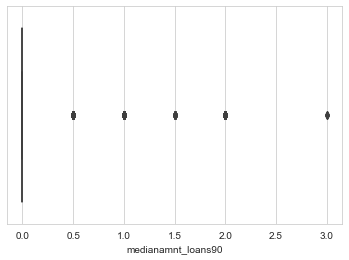

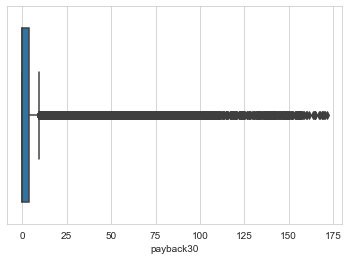

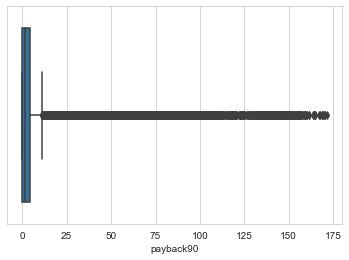

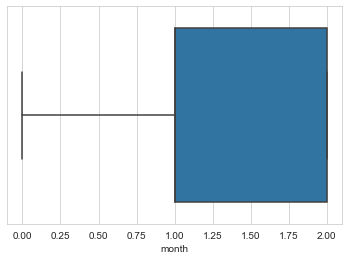

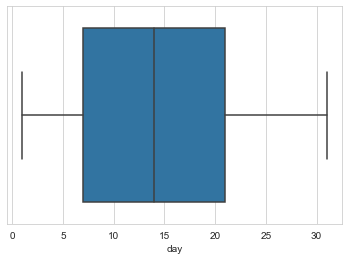

In [116]:
#lets plot the boxplot to identify the outliers.
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Nearly all of the columns have outliers and it can be handled by using z-score method

# Handling outliers by using z-score method

In [117]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([    21,     22,     22, ..., 208539, 208540, 208540], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [118]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,1,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,1,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,1,25


In [119]:
df.shape 

(208546, 35)

In [120]:
df_new.shape

(160511, 35)

# Preparing dataset for model training

In [121]:
df_x=df.drop('label',axis=1)  
y=df['label']

In [122]:
#Checking x data
df_x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,1,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2,22


In [123]:
#Checking y data after splitting
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# Treating skewness

In [124]:
#We are treating skewness by using square root and cube root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])   
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col]) 
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col]) 
#We run these many if conditions as the skewness value is higher and inorder to reduce the value very less, we are using them.            

In [125]:
df_x.skew()

aon                      3.653392
daily_decr30             0.260082
daily_decr90             0.316045
rental30                 0.056502
rental90                 0.135710
last_rech_date_ma       -1.940169
last_rech_date_da        6.179128
last_rech_amt_ma        -1.152198
cnt_ma_rech30            0.362107
fr_ma_rech30            -0.355185
sumamnt_ma_rech30       -0.801117
medianamnt_ma_rech30    -1.152688
medianmarechprebal30    -0.079776
cnt_ma_rech90           -0.975110
fr_ma_rech90            -0.032321
sumamnt_ma_rech90       -0.664905
medianamnt_ma_rech90    -1.259229
medianmarechprebal90     0.011205
cnt_da_rech30            8.160983
fr_da_rech30            12.558535
cnt_da_rech90            6.018233
fr_da_rech90            15.534219
cnt_loans30             -0.579139
amnt_loans30            -0.474191
maxamnt_loans30         -1.569673
medianamnt_loans30       3.454268
cnt_loans90             -5.086911
amnt_loans90             0.207273
maxamnt_loans90         -0.901493
medianamnt_loa

We can see that skewness has been treated and we can proceed further analysis

In [126]:
df_x.dropna(axis=1,inplace=True)

# Using PCA to reduce the data size

As there are 30+ columns in this dataset, we can reduce the dimensions by using Principal Component Analysis Technique

In [127]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)   #Reducing to 10 columns
xpca=pca.fit_transform(df_x)
df_x=pd.DataFrame(xpca)
df_x

,0,1,2,3,4,5,6,7,8,9
0,5.513782,-1.031988,-0.803608,-0.892966,-2.675019,-0.161467,-0.023866,0.421687,0.139641,-0.334938
1,-3.915360,3.822526,-3.964049,-1.228014,0.723975,0.943117,2.186579,-0.557046,0.397508,-0.730093
2,4.200763,-2.691342,-2.425070,-0.858870,0.717688,0.316118,1.525742,0.689978,0.547230,-0.795515
3,-9.635672,-7.307911,-2.529228,4.690458,0.056457,1.256572,-0.925518,-0.567534,-0.483268,-0.115605
4,8.446566,4.764512,1.171087,-0.219332,0.199458,0.567154,-0.686153,-0.142469,-0.623948,-0.034470
...,...,...,...,...,...,...,...,...,...,...
208541,3.192145,3.557335,-1.395880,-0.973326,-0.173680,0.613832,-0.616781,-0.006056,-0.008938,0.160884
208542,-2.484761,-0.587731,0.501219,-0.523019,-0.359666,0.257847,-0.740004,-0.189002,-0.333770,0.030008
208543,14.996816,1.488343,1.371781,0.726350,-0.513591,-0.145348,0.782340,-0.913112,-0.045239,0.051305
208544,11.010403,1.860632,1.700234,0.802165,0.418665,-0.511217,0.428878,-0.771464,-0.641202,-0.792199


# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [128]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,0,1,2,3,4,5,6,7,8,9
0,0.649919,-0.164125,-0.399961,-0.604645,-2.750889,-0.201905,-0.032731,0.656652,0.247915,-0.782745
1,-0.461510,0.607926,-1.972933,-0.831513,0.744509,1.179311,2.998827,-0.867432,0.705726,-1.706215
2,0.495151,-0.428025,-1.206973,-0.581558,0.738044,0.395287,2.092508,1.074435,0.971539,-1.859105
3,-1.135773,-1.162233,-1.258813,3.176001,0.058058,1.571267,-1.269320,-0.883764,-0.857983,-0.270166
4,0.995611,0.757737,0.582858,-0.148514,0.205115,0.709192,-0.941038,-0.221853,-1.107744,-0.080555
...,...,...,...,...,...,...,...,...,...,...
208541,0.376264,0.565750,-0.694739,-0.659058,-0.178606,0.767560,-0.845896,-0.009431,-0.015868,0.375982
208542,-0.292883,-0.093471,0.249460,-0.354147,-0.369867,0.322422,-1.014894,-0.294315,-0.592568,0.070128
208543,1.767701,0.236703,0.682744,0.491826,-0.528158,-0.181749,1.072956,-1.421899,-0.080317,0.119899
208544,1.297815,0.295911,0.846217,0.543162,0.430539,-0.639246,0.588193,-1.201324,-1.138376,-1.851356


# Building the model

In [129]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [130]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training accuracy_score is: ',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is: ',accuracy_score(y_test,pred_test)*100)

At random state 33 ,the model performs well
Training accuracy_score is:  87.79699824977823
Testing accuracy_score is:  87.79908894749461
At random state 105 ,the model performs well
Training accuracy_score is:  87.79759764079695
Testing accuracy_score is:  87.79669144090147
At random state 116 ,the model performs well
Training accuracy_score is:  87.79579946774078
Testing accuracy_score is:  87.80388396068089
At random state 160 ,the model performs well
Training accuracy_score is:  87.7963988587595
Testing accuracy_score is:  87.80148645408775
At random state 199 ,the model performs well
Training accuracy_score is:  87.75264331439257
Testing accuracy_score is:  87.75113881563175
At random state 268 ,the model performs well
Training accuracy_score is:  87.79579946774078
Testing accuracy_score is:  87.80148645408775
At random state 323 ,the model performs well
Training accuracy_score is:  87.75024575031767
Testing accuracy_score is:  87.75113881563175
At random state 338 ,the model perfo

We can see that at random_state=116, the best scores are obtained so that we can use in our train_test_split

In [131]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=116,test_size=.20,stratify=y)

# Finding out the best model

We are going to use LogisticRegression, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those. Also we will use Ensemble Techniques like RandomForest, Adaboost and GradientBoosting algorithms to find the best performing model.

In [132]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
#Initializing the instance of the model
LR=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [134]:
models= []
models.append(('Logistic Regression',LR))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [135]:
#Importing required modules and metrices
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8785662910573004


cross_val_score:  0.8776912514473404


roc_auc_score:  0.5327353727765934


Classification report:
 
              precision    recall  f1-score   support

           0       0.62      0.07      0.13      5207
           1       0.88      0.99      0.93     36503

    accuracy                           0.88     41710
   macro avg       0.75      0.53      0.53     41710
weighted avg       0.85      0.88      0.83     41710



Confusion matrix: 

[[  374  4833]
 [  232 36271]]


AUC_ROC curve:



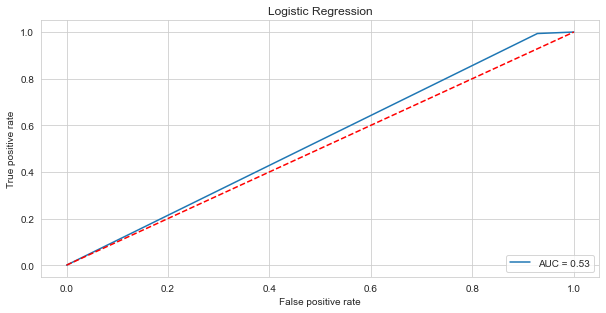





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score:  0.8594581635099496


cross_val_score:  0.8588896441033699


roc_auc_score:  0.6974221191655938


Classification report:
 
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      5207
           1       0.93      0.91      0.92     36503

    accuracy                           0.86     41710
   macro avg       0.68      0.70      0.69     41710
weighted avg       0.86      0.86      0.86     41710



Confusion matrix: 

[[ 2507  2700]
 [ 3162 33341]]


AUC_ROC curve:



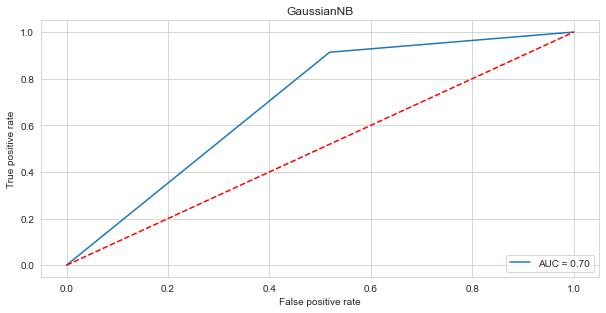





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.8522656437305203


cross_val_score:  0.8545644639191871


roc_auc_score:  0.6817047498762319


Classification report:
 
              precision    recall  f1-score   support

           0       0.42      0.45      0.43      5207
           1       0.92      0.91      0.92     36503

    accuracy                           0.85     41710
   macro avg       0.67      0.68      0.67     41710
weighted avg       0.86      0.85      0.86     41710



Confusion matrix: 

[[ 2366  2841]
 [ 3321 33182]]


AUC_ROC curve:



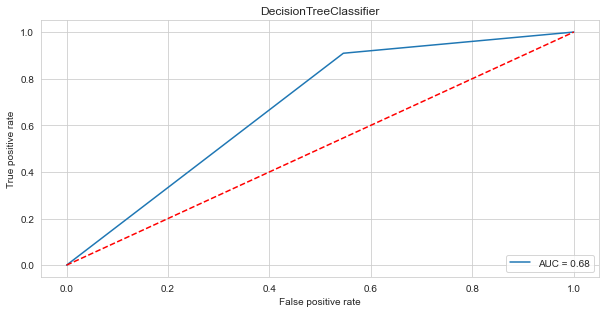





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.8770318868376888


cross_val_score:  0.8787077959672857


roc_auc_score:  0.6690979714903665


Classification report:
 
              precision    recall  f1-score   support

           0       0.51      0.39      0.44      5207
           1       0.92      0.95      0.93     36503

    accuracy                           0.88     41710
   macro avg       0.71      0.67      0.69     41710
weighted avg       0.87      0.88      0.87     41710



Confusion matrix: 

[[ 2041  3166]
 [ 1963 34540]]


AUC_ROC curve:



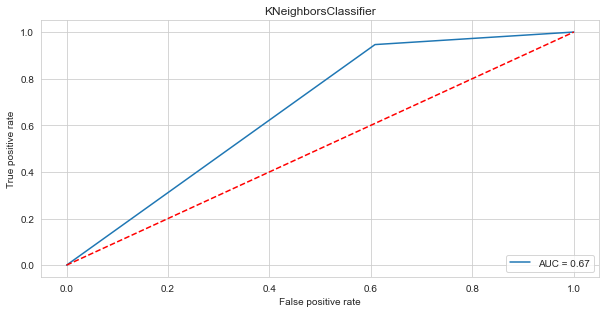





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.8857588108367298


cross_val_score:  0.8869218349678185


roc_auc_score:  0.6733429193591172


Classification report:
 
              precision    recall  f1-score   support

           0       0.56      0.39      0.46      5207
           1       0.92      0.96      0.94     36503

    accuracy                           0.89     41710
   macro avg       0.74      0.67      0.70     41710
weighted avg       0.87      0.89      0.88     41710



Confusion matrix: 

[[ 2032  3175]
 [ 1590 34913]]


AUC_ROC curve:



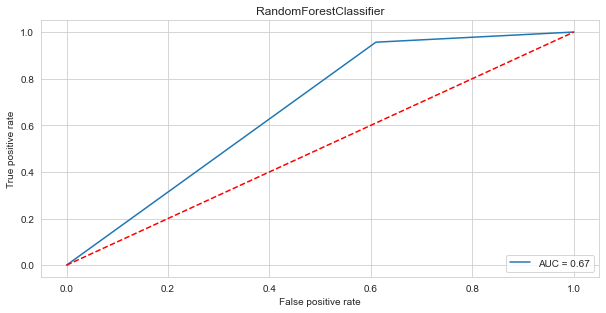





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.8832414289139295


cross_val_score:  0.8817718960758117


roc_auc_score:  0.6172395016284458


Classification report:
 
              precision    recall  f1-score   support

           0       0.57      0.26      0.36      5207
           1       0.90      0.97      0.94     36503

    accuracy                           0.88     41710
   macro avg       0.74      0.62      0.65     41710
weighted avg       0.86      0.88      0.86     41710



Confusion matrix: 

[[ 1368  3839]
 [ 1031 35472]]


AUC_ROC curve:



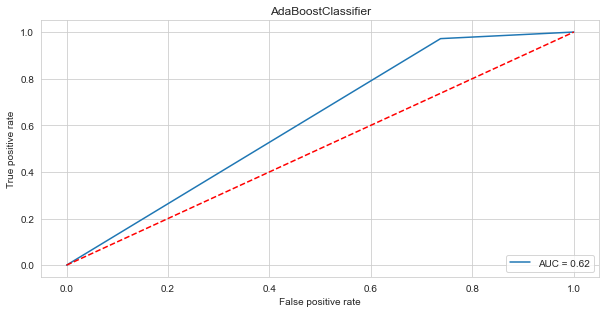





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.8907935746823303


cross_val_score:  0.8902544291432415


roc_auc_score:  0.6547320279128569


Classification report:
 
              precision    recall  f1-score   support

           0       0.61      0.34      0.44      5207
           1       0.91      0.97      0.94     36503

    accuracy                           0.89     41710
   macro avg       0.76      0.65      0.69     41710
weighted avg       0.87      0.89      0.88     41710



Confusion matrix: 

[[ 1771  3436]
 [ 1119 35384]]


AUC_ROC curve:



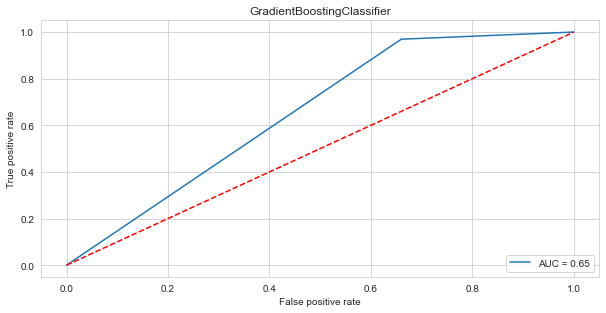

In [136]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [137]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,Logistic Regression,87.856629,87.769125,53.273537
1,GaussianNB,85.945816,85.888964,69.742212
2,DecisionTreeClassifier,85.226564,85.456446,68.170475
3,KNeighborsClassifier,87.703189,87.870780,66.909797
4,RandomForestClassifier,88.575881,88.692183,67.334292
5,AdaBoostClassifier,88.324143,88.177190,61.723950
6,GradientBoostingClassifier,89.079357,89.025443,65.473203


We can see that Gradient Boosting Classifier algorithm is performing well compared to other algorithms, as it is giving an accuracy score of 89.07 and cross validation score of 89.02. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyperparameter Tuning

In [141]:
#Creating parameter list to pass in GridSearchCV
parameters={'n_estimators':[50,100,500],'learning_rate':[0.0001,0.001,0.01,0.1]}  

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(random_state=116)   
gbc=GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')
gbc.fit(x_train,y_train)
print(gbc.best_params_)     
print(gbc.best_score_) 

{'learning_rate': 0.1, 'n_estimators': 500}
0.8909887671926541


In [144]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=116,n_estimators=500,learning_rate=0.1)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  89.16806521217934
Cross validation score:  89.13716896335315
Classification report: 

              precision    recall  f1-score   support

           0       0.61      0.37      0.46      5207
           1       0.91      0.97      0.94     36503

    accuracy                           0.89     41710
   macro avg       0.76      0.67      0.70     41710
weighted avg       0.88      0.89      0.88     41710

Confusion matrix: 

[[ 1902  3305]
 [ 1213 35290]]


After applying the Tuning, we can see that our scores had been increased with the help of best parameters obtained, i.e, accuracy score from 89.07 to 89.16 and cross validation score from 89.02 to 89.13, and they are good scores too. Now, we will finalize Gradient Boosting Classifier algorithm model as the final model.

# Finalizing the model

In [145]:
gbc_prediction=gbc.predict(x)
print('Predictions of GradientBoosting Classifier: ',gbc_prediction)

Predictions of GradientBoosting Classifier:  [1 1 1 ... 1 1 1]


In [146]:
#Saving the final model
import joblib
joblib.dump(gbc,'Micro_CreditProject_Classification.obj')

['Micro_CreditProject_Classification.obj']

# Saving the predicted values in a csv file

In [147]:
pred_results=pd.DataFrame(gbc_prediction)
pred_results.to_csv('Micro_CreditProject_Predictions.csv')

# Conclusion

1.After getting an insight of this dataset, we were able to understand how the people took loans and how they repayed on the basis of various factors.

2.First we loaded the dataset and did the EDA process and other pre-processing techniques like skewness check and removal, handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

3.There were some customers with no loan history and it is because the data is imbalanced such that, label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

4.There were many outliers present in the dataset and eventhough they were present, we used the original data itself as the data loss should not be more than 7-8% of data. When we checked the percentage loss after handling outliers, it was nearly 22% so that we used the original data itself with outliers in it.

5.Then we did the model training, building the model and finding out the best model on the basis of different metrices scores we got like ROC-AUC curve, Classification Report, Confusion matrix, etc.

6.We used algorithms like LogisticRegression, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those. We also used Ensemble Techniques like RandomForest, Adaboost and GradientBoosting algorithms to find the best performing model.

7.After performing the analysis, we got Gradient Boosting Classifier algorithm as the best algorithms among all as it gave an accuracy score of 89.07 and cross_val_score of 89.02, which was highest among all. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning.

8.The problem while doing Hyperparameter Tuning is that it took nearly 2 hours to fetch the best parameters as there were nearly 2lakh records to process through and for ensemble techniques normally, tuning takes more time. For avoiding this problem, we can use other notebooks like Google Colaboratory for processing faster.

9.After Tuning, we saw that our scores had been increased with the help of best parameters obtained, i.e, accuracy score from 89.07 to 89.16 and cross validation score from 89.02 to 89.13, and they are good scores too.

10.We finalized the best model we obtained by saving the model in a obj file. Also we found the predictions obtained and saved it in a new dataframe.

11.The problems in this dataset were: High skewness, more outliers, time consumption due to more number of records.

12.Overall, we can say that it is a good dataset to predict the micro credit predictions and we can also used the finalized model for deployment process too.

13.We can improve the data by adding more features that are positively correlated with the target variable, having less outliers, normally distributed values, etc.